In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [20, 15]

In [2]:
#Use Week 3 stock return processed dataset to calculate the average monthly return in the previous 12 months 
#skipping the most recent month for every stock-year-month (gvkey-datadate). 
retoriginal=pd.read_stata("/Users/jimmyaspras/Downloads/stock return processed.dta")
retoriginal.columns

Index(['index', 'gvkey', 'iid', 'datadate', 'tic', 'cusip', 'conm', 'primiss',
       'cshtrm', 'curcdm', 'prccm', 'trt1m', 'cshoq', 'cshom', 'exchg', 'tpci',
       'fic', 'sic', 'Year', 'Month', 'ret', 'mv_million', 'share_turnover'],
      dtype='object')

In [3]:
retoriginal=retoriginal[retoriginal['prccm']>=5]
avgmonthlyreturn=retoriginal[['gvkey','datadate','ret','prccm']]
avgmonthlyreturn

,gvkey,datadate,ret,prccm
0,001004,2001-01-31,0.209901,15.19
1,001004,2001-02-28,-0.104674,13.60
2,001004,2001-03-31,-0.061765,12.76
3,001004,2001-04-30,-0.113245,11.23
4,001004,2001-05-31,0.246661,14.00
...,...,...,...,...
990943,345980,2021-01-31,0.648575,30.07
990944,345980,2021-02-28,-0.347855,19.61
990945,345980,2021-03-31,-0.194289,15.80
990946,345980,2021-04-30,-0.122152,13.87


In [4]:
avgmonthlyreturn['ret'].describe()

count    796411.000000
mean          0.021861
std           1.101807
min          -0.942720
25%          -0.043103
50%           0.010175
75%           0.068406
max         631.000000
Name: ret, dtype: float64

In [5]:
lagreturn=retoriginal[['gvkey','datadate','ret']]
lagreturn.rename(columns={'datadate':'lagdate'}, inplace=True)
lagreturn.rename(columns={'ret':'lagret'}, inplace=True)
lagreturn

/Users/jimmyaspras/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,gvkey,lagdate,lagret
0,001004,2001-01-31,0.209901
1,001004,2001-02-28,-0.104674
2,001004,2001-03-31,-0.061765
3,001004,2001-04-30,-0.113245
4,001004,2001-05-31,0.246661
...,...,...,...
990943,345980,2021-01-31,0.648575
990944,345980,2021-02-28,-0.347855
990945,345980,2021-03-31,-0.194289
990946,345980,2021-04-30,-0.122152


In [6]:
mergedret=pd.merge(avgmonthlyreturn,lagreturn,left_on=['gvkey'], right_on=['gvkey'], how='inner')
mergedret

,gvkey,datadate,ret,prccm,lagdate,lagret
0,001004,2001-01-31,0.209901,15.19,2001-01-31,0.209901
1,001004,2001-01-31,0.209901,15.19,2001-02-28,-0.104674
2,001004,2001-01-31,0.209901,15.19,2001-03-31,-0.061765
3,001004,2001-01-31,0.209901,15.19,2001-04-30,-0.113245
4,001004,2001-01-31,0.209901,15.19,2001-05-31,0.246661
...,...,...,...,...,...,...
132750326,345980,2021-04-30,-0.122152,13.87,2021-01-31,0.648575
132750327,345980,2021-04-30,-0.122152,13.87,2021-02-28,-0.347855
132750328,345980,2021-04-30,-0.122152,13.87,2021-03-31,-0.194289
132750329,345980,2021-04-30,-0.122152,13.87,2021-04-30,-0.122152


In [7]:
mergedret['datediff']=mergedret['datadate']-mergedret['lagdate']
mergedret

,gvkey,datadate,ret,prccm,lagdate,lagret,datediff
0,001004,2001-01-31,0.209901,15.19,2001-01-31,0.209901,0 days
1,001004,2001-01-31,0.209901,15.19,2001-02-28,-0.104674,-28 days
2,001004,2001-01-31,0.209901,15.19,2001-03-31,-0.061765,-59 days
3,001004,2001-01-31,0.209901,15.19,2001-04-30,-0.113245,-89 days
4,001004,2001-01-31,0.209901,15.19,2001-05-31,0.246661,-120 days
...,...,...,...,...,...,...,...
132750326,345980,2021-04-30,-0.122152,13.87,2021-01-31,0.648575,89 days
132750327,345980,2021-04-30,-0.122152,13.87,2021-02-28,-0.347855,61 days
132750328,345980,2021-04-30,-0.122152,13.87,2021-03-31,-0.194289,30 days
132750329,345980,2021-04-30,-0.122152,13.87,2021-04-30,-0.122152,0 days


In [8]:
mergedret=mergedret[(mergedret['datediff']>pd.Timedelta(days=55))&(mergedret['datediff']<pd.Timedelta(days=370))]
mergedret

,gvkey,datadate,ret,prccm,lagdate,lagret,datediff
474,001004,2001-03-31,-0.061765,12.76,2001-01-31,0.209901,59 days
711,001004,2001-04-30,-0.113245,11.23,2001-01-31,0.209901,89 days
712,001004,2001-04-30,-0.113245,11.23,2001-02-28,-0.104674,61 days
948,001004,2001-05-31,0.246661,14.00,2001-01-31,0.209901,120 days
949,001004,2001-05-31,0.246661,14.00,2001-02-28,-0.104674,92 days
...,...,...,...,...,...,...,...
132750310,345920,2021-04-30,0.089191,65.70,2021-01-31,0.436097,89 days
132750311,345920,2021-04-30,0.089191,65.70,2021-02-28,-0.159317,61 days
132750322,345980,2021-03-31,-0.194289,15.80,2021-01-31,0.648575,59 days
132750326,345980,2021-04-30,-0.122152,13.87,2021-01-31,0.648575,89 days


In [9]:
mergedret['Year']=mergedret['datadate'].dt.year
mergedret['Month']=mergedret['datadate'].dt.month
mergedret

<ipython-input-9-48b733cd9af0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedret['Year']=mergedret['datadate'].dt.year
<ipython-input-9-48b733cd9af0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedret['Month']=mergedret['datadate'].dt.month


,gvkey,datadate,ret,prccm,lagdate,lagret,datediff,Year,Month
474,001004,2001-03-31,-0.061765,12.76,2001-01-31,0.209901,59 days,2001,3
711,001004,2001-04-30,-0.113245,11.23,2001-01-31,0.209901,89 days,2001,4
712,001004,2001-04-30,-0.113245,11.23,2001-02-28,-0.104674,61 days,2001,4
948,001004,2001-05-31,0.246661,14.00,2001-01-31,0.209901,120 days,2001,5
949,001004,2001-05-31,0.246661,14.00,2001-02-28,-0.104674,92 days,2001,5
...,...,...,...,...,...,...,...,...,...
132750310,345920,2021-04-30,0.089191,65.70,2021-01-31,0.436097,89 days,2021,4
132750311,345920,2021-04-30,0.089191,65.70,2021-02-28,-0.159317,61 days,2021,4
132750322,345980,2021-03-31,-0.194289,15.80,2021-01-31,0.648575,59 days,2021,3
132750326,345980,2021-04-30,-0.122152,13.87,2021-01-31,0.648575,89 days,2021,4


In [10]:
#Find the stocks with >= 90th percentile past 12-month average returns in each year-month. 
#And construct the monthly returns of an equal-weighted portfolio for these stocks.
ninetyperc=mergedret[['lagret','Year','Month']].groupby(['Year','Month'], as_index=False).quantile(0.9)
ninetyperc.rename(columns={'lagret':'ranked_ret'}, inplace=True)
ninetyperc

,Year,Month,ranked_ret
0,2001,3,0.376268
1,2001,4,0.246883
2,2001,5,0.202233
3,2001,6,0.233591
4,2001,7,0.235659
...,...,...,...
237,2020,12,0.183455
238,2021,1,0.225378
239,2021,2,0.235703
240,2021,3,0.244792


In [11]:
ninetyperc1=pd.merge(mergedret,ninetyperc,left_on=['Year','Month'], right_on=['Year','Month'],how='inner')
ninetyperc1

,gvkey,datadate,ret,prccm,lagdate,lagret,datediff,Year,Month,ranked_ret
0,001004,2001-03-31,-0.061765,12.7600,2001-01-31,0.209901,59 days,2001,3,0.376268
1,001013,2001-03-31,-0.235955,8.5000,2001-01-31,-0.196552,59 days,2001,3,0.376268
2,001034,2001-03-31,-0.015338,32.7400,2001-01-31,-0.155670,59 days,2001,3,0.376268
3,001038,2001-03-31,0.180000,7.0800,2001-01-31,0.400000,59 days,2001,3,0.376268
4,001056,2001-03-31,-0.228972,10.3125,2001-01-31,-0.098103,59 days,2001,3,0.376268
...,...,...,...,...,...,...,...,...,...,...
7925731,151829,2003-05-31,0.212644,20.8500,2003-01-31,0.585263,120 days,2003,5,0.121858
7925732,151829,2003-05-31,0.212644,20.8500,2003-02-28,0.105578,92 days,2003,5,0.121858
7925733,151829,2003-05-31,0.212644,20.8500,2003-03-31,0.060366,61 days,2003,5,0.121858
7925734,152049,2003-05-31,0.000000,11.0000,2003-03-31,0.047619,61 days,2003,5,0.121858


In [12]:
rankedquants=ninetyperc1[ninetyperc1['lagret']>=ninetyperc1['ranked_ret']]
rankedquants

,gvkey,datadate,ret,prccm,lagdate,lagret,datediff,Year,Month,ranked_ret
3,001038,2001-03-31,0.180000,7.08,2001-01-31,0.400000,59 days,2001,3,0.376268
9,001095,2001-03-31,-0.134961,12.05,2001-01-31,0.621111,59 days,2001,3,0.376268
12,001161,2001-03-31,0.234419,26.54,2001-01-31,0.780995,59 days,2001,3,0.376268
16,001213,2001-03-31,-0.014535,10.17,2001-01-31,0.395897,59 days,2001,3,0.376268
50,001577,2001-03-31,-0.165872,8.75,2001-01-31,0.775000,59 days,2001,3,0.376268
...,...,...,...,...,...,...,...,...,...,...
7925716,150699,2003-05-31,0.104061,21.75,2002-12-31,0.183862,151 days,2003,5,0.121858
7925725,150838,2003-05-31,0.029086,41.75,2002-11-30,0.214365,182 days,2003,5,0.121858
7925727,150838,2003-05-31,0.029086,41.75,2003-01-31,0.239467,120 days,2003,5,0.121858
7925731,151829,2003-05-31,0.212644,20.85,2003-01-31,0.585263,120 days,2003,5,0.121858


In [13]:
ewport=rankedquants[['Year','Month', 'ranked_ret']].groupby(['Year','Month'],as_index=False).mean()
ewport.dropna(inplace=True)
ewport['date']= pd.to_datetime({'year': ewport['Year'],'month': ewport['Month'],'day':28})
ewport

,Year,Month,ranked_ret,date
0,2001,3,0.376268,2001-03-28
1,2001,4,0.246883,2001-04-28
2,2001,5,0.202233,2001-05-28
3,2001,6,0.233591,2001-06-28
4,2001,7,0.235659,2001-07-28
...,...,...,...,...
237,2020,12,0.183455,2020-12-28
238,2021,1,0.225378,2021-01-28
239,2021,2,0.235703,2021-02-28
240,2021,3,0.244792,2021-03-28


In [14]:
ewport['ranked_ret'].mean()

0.14361679716732564

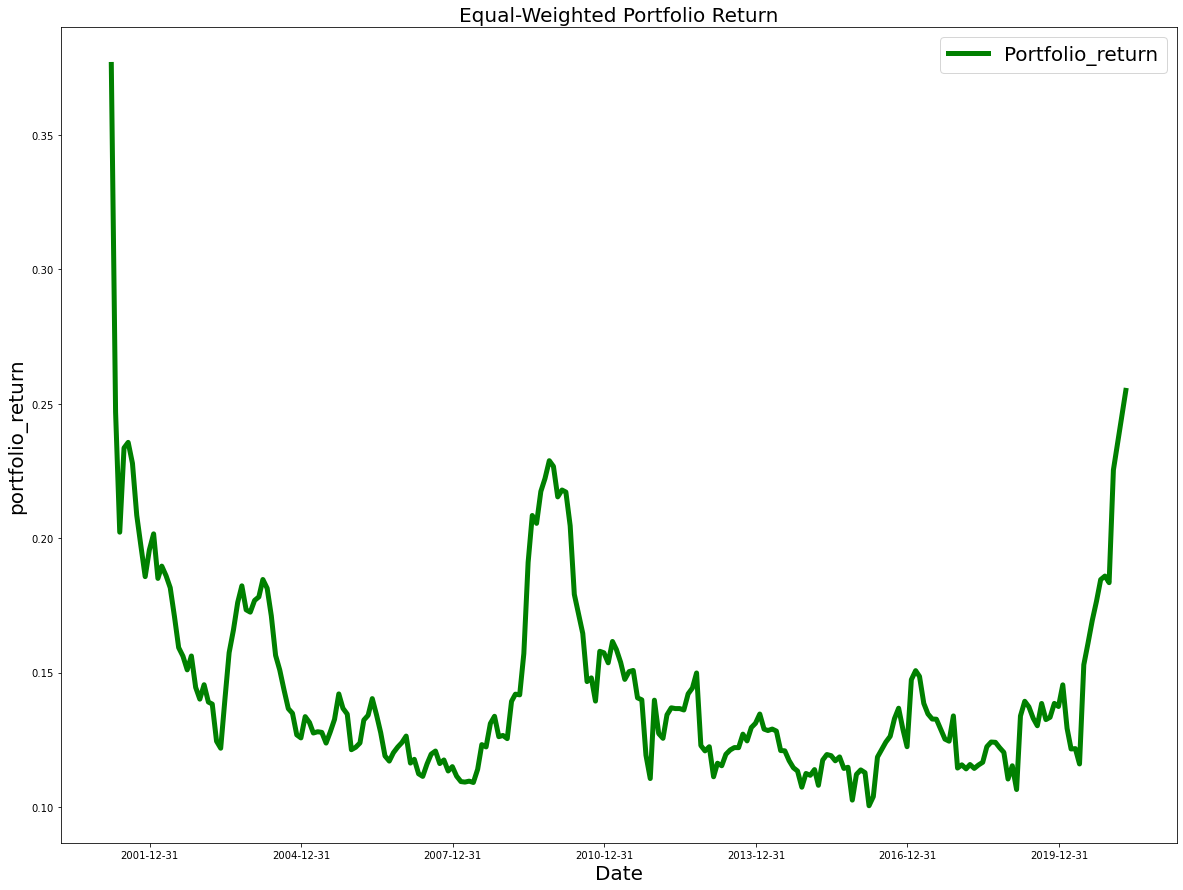

In [15]:
plt.plot(ewport['date'],ewport['ranked_ret'], color='green', linewidth=5)
plt.xlabel('Date', fontsize=20)
plt.ylabel('portfolio_return', fontsize=20)
plt.title('Equal-Weighted Portfolio Return', fontsize=20)
plt.legend(['Portfolio_return'], fontsize=20)
plt.gca().xaxis.set_major_locator(dates.YearLocator(3, month=12, day=31))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 47., 56., 42., 19.,
        17.,  5., 10., 11.,  3.,  6.,  4.,  5.,  3.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
        -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
        -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24,
        -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15,
        -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
        -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
        

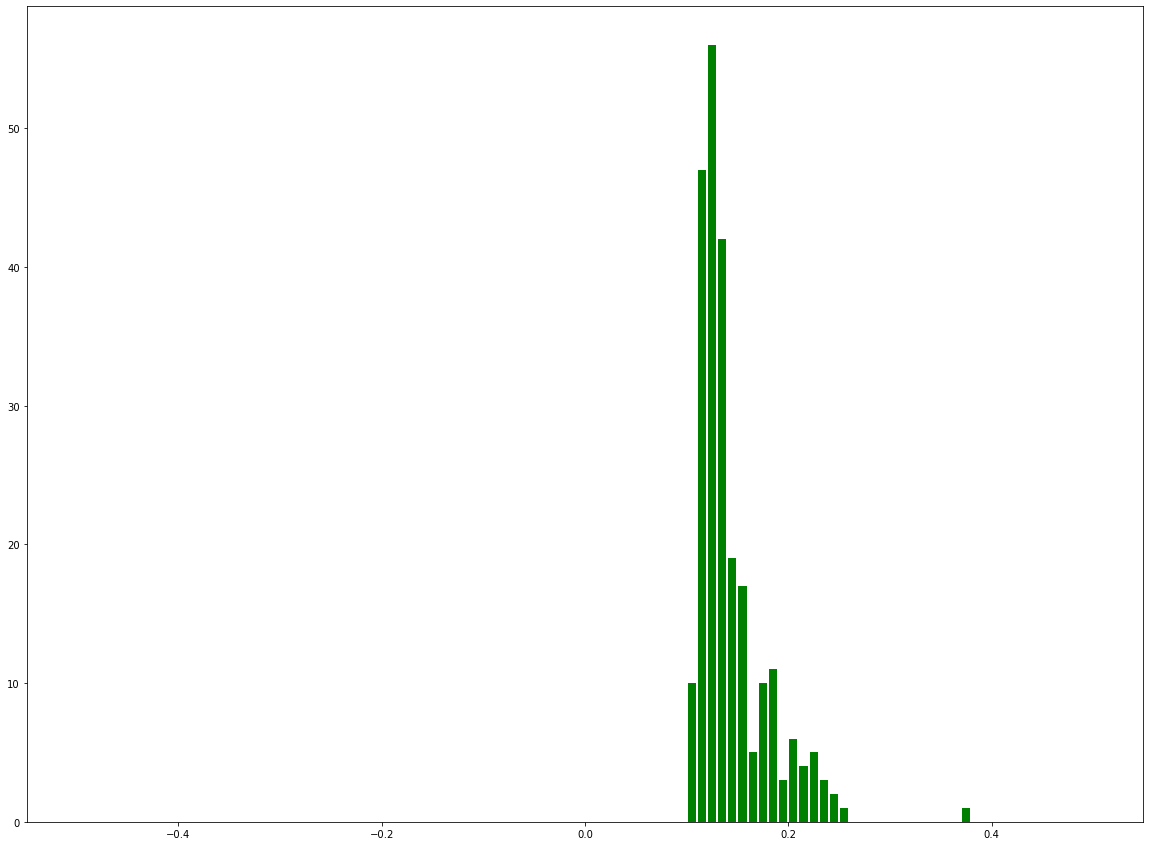

In [16]:
plt.hist(ewport['ranked_ret'], bins = 100, range=(-0.5,0.5), rwidth=0.8, color='green')

In [17]:
#Run regressions to test the statistical significance of the average portfolio return and the 
#average portfolio return in excess of S&P500 index returns. Copy and report the regression outputs.
ewportreg=sm.add_constant(ewport)
ewportreg1=sm.OLS(ewportreg[['ranked_ret']],ewportreg[['const']]).fit().get_robustcov_results(cov_type='HC0')
ewportreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ranked_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 10 Jul 2021   Prob (F-statistic):                nan
Time:                        17:54:32   Log-Likelihood:                 463.54
No. Observations:                 242   AIC:                            -925.1
Df Residuals:                     241   BIC:                            -921.6
Df Model:                           0                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1436      0.002     62.694      0.000       0.139       0.148
==============================================================================
Omnibus:                      131.441   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.733
Skew:                           2.164   Prob(JB):                    1.16e-162
Kurtosis:                      10.431   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [18]:
#The average portfolio return is 14.36%, and with a p value of 0 or close to 0, this is statistically significant.

In [19]:
indexret1=pd.read_stata("/Users/jimmyaspras/Downloads/Index return.dta")
indexret1

,sp500_ret_m,nasdaq_ret_m,r2000_ret_m,Year,Month,Date
0,-0.041753,-0.046186,-0.000383,2000,1,2000-01-28
1,-0.020108,0.191947,0.164198,2000,2,2000-02-28
2,0.096720,-0.026372,-0.066850,2000,3,2000-03-28
3,-0.030796,-0.155739,-0.060918,2000,4,2000-04-28
4,-0.021915,-0.119086,-0.059398,2000,5,2000-05-28
...,...,...,...,...,...,...
251,0.037121,0.056526,0.085195,2020,12,2020-12-28
252,-0.011137,0.014153,0.050019,2021,1,2021-01-28
253,0.026091,0.009308,0.061443,2021,2,2021-02-28
254,0.042439,0.004133,0.008846,2021,3,2021-03-28


In [20]:
indexportmerge=pd.merge(ewportreg,indexret1,left_on=['Year','Month'], right_on=['Year','Month'],how='inner')
indexportmerge

,const,Year,Month,ranked_ret,date,sp500_ret_m,nasdaq_ret_m,r2000_ret_m,Date
0,1.0,2001,3,0.376268,2001-03-28,-0.064205,-0.144793,-0.050256,2001-03-28
1,1.0,2001,4,0.246883,2001-04-28,0.076814,0.149968,0.077220,2001-04-28
2,1.0,2001,5,0.202233,2001-05-28,0.005090,-0.002717,0.023036,2001-05-28
3,1.0,2001,6,0.233591,2001-06-28,-0.025035,0.023715,0.032508,2001-06-28
4,1.0,2001,7,0.235659,2001-07-28,-0.010740,-0.061748,-0.054346,2001-07-28
...,...,...,...,...,...,...,...,...,...
237,1.0,2020,12,0.183455,2020-12-28,0.037121,0.056526,0.085195,2020-12-28
238,1.0,2021,1,0.225378,2021-01-28,-0.011137,0.014153,0.050019,2021-01-28
239,1.0,2021,2,0.235703,2021-02-28,0.026091,0.009308,0.061443,2021-02-28
240,1.0,2021,3,0.244792,2021-03-28,0.042439,0.004133,0.008846,2021-03-28


In [21]:
indexportmerge['ninety_perc_ex']=indexportmerge['ranked_ret']-indexportmerge['sp500_ret_m']
indexportmerge

,const,Year,Month,ranked_ret,date,sp500_ret_m,nasdaq_ret_m,r2000_ret_m,Date,ninety_perc_ex
0,1.0,2001,3,0.376268,2001-03-28,-0.064205,-0.144793,-0.050256,2001-03-28,0.440472
1,1.0,2001,4,0.246883,2001-04-28,0.076814,0.149968,0.077220,2001-04-28,0.170068
2,1.0,2001,5,0.202233,2001-05-28,0.005090,-0.002717,0.023036,2001-05-28,0.197143
3,1.0,2001,6,0.233591,2001-06-28,-0.025035,0.023715,0.032508,2001-06-28,0.258627
4,1.0,2001,7,0.235659,2001-07-28,-0.010740,-0.061748,-0.054346,2001-07-28,0.246399
...,...,...,...,...,...,...,...,...,...,...
237,1.0,2020,12,0.183455,2020-12-28,0.037121,0.056526,0.085195,2020-12-28,0.146334
238,1.0,2021,1,0.225378,2021-01-28,-0.011137,0.014153,0.050019,2021-01-28,0.236515
239,1.0,2021,2,0.235703,2021-02-28,0.026091,0.009308,0.061443,2021-02-28,0.209612
240,1.0,2021,3,0.244792,2021-03-28,0.042439,0.004133,0.008846,2021-03-28,0.202353


In [22]:
ninetypercexreg=sm.OLS(indexportmerge[['ninety_perc_ex']],indexportmerge[['const']]).fit().get_robustcov_results(cov_type='HC0')
ninetypercexreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ninety_perc_ex   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 10 Jul 2021   Prob (F-statistic):                nan
Time:                        17:54:34   Log-Likelihood:                 354.90
No. Observations:                 242   AIC:                            -707.8
Df Residuals:                     241   BIC:                            -704.3
Df Model:                           0                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1376      0.004     38.354      0.000       0.131       0.145
==============================================================================
Omnibus:                       59.256   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.398
Skew:                           1.101   Prob(JB):                     1.33e-33
Kurtosis:                       6.189   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [23]:
#The average return of the 90th percentile portfolio performs 13.76% in excess of the S&P
#With a p value of 0 or close to 0, this is statistically significant

In [24]:
#Regress portfolio returns in excess of risk-free rate on the six factors. Copy and report the regression outputs.
factors=pd.read_excel("/Users/jimmyaspras/Downloads/Factors.xlsx")
factors

,Year,Month,MktRF,SMB,HML,RMW,CMA,MOM,RF
0,1963,7,-0.0039,-0.0045,-0.0094,0.0066,-0.0115,0.0100,0.0027
1,1963,8,0.0507,-0.0082,0.0182,0.0040,-0.0040,0.0103,0.0025
2,1963,9,-0.0157,-0.0048,0.0017,-0.0076,0.0024,0.0016,0.0027
3,1963,10,0.0253,-0.0130,-0.0004,0.0275,-0.0224,0.0314,0.0029
4,1963,11,-0.0085,-0.0085,0.0170,-0.0045,0.0222,-0.0075,0.0027
...,...,...,...,...,...,...,...,...,...
688,2020,11,0.1247,0.0675,0.0211,-0.0278,0.0105,-0.1225,0.0001
689,2020,12,0.0463,0.0467,-0.0136,-0.0215,0.0000,-0.0242,0.0001
690,2021,1,-0.0003,0.0688,0.0285,-0.0333,0.0468,0.0437,0.0000
691,2021,2,0.0278,0.0451,0.0708,0.0009,-0.0197,-0.0768,0.0000


In [25]:
ninetypercfactors=pd.merge(ewport, factors, left_on=['Year','Month'], right_on=['Year','Month'])
ninetypercfactors

,Year,Month,ranked_ret,date,MktRF,SMB,HML,RMW,CMA,MOM,RF
0,2001,3,0.376268,2001-03-28,-0.0726,0.0227,0.0652,0.0327,0.0394,0.0835,0.0042
1,2001,4,0.246883,2001-04-28,0.0794,-0.0066,-0.0480,-0.0342,-0.0395,-0.0797,0.0039
2,2001,5,0.202233,2001-05-28,0.0072,0.0356,0.0334,0.0017,0.0218,0.0212,0.0032
3,2001,6,0.233591,2001-06-28,-0.0194,0.0663,-0.0116,0.0132,-0.0179,0.0034,0.0028
4,2001,7,0.235659,2001-07-28,-0.0213,-0.0283,0.0535,0.0742,0.0301,0.0547,0.0030
...,...,...,...,...,...,...,...,...,...,...,...
236,2020,11,0.185914,2020-11-28,0.1247,0.0675,0.0211,-0.0278,0.0105,-0.1225,0.0001
237,2020,12,0.183455,2020-12-28,0.0463,0.0467,-0.0136,-0.0215,0.0000,-0.0242,0.0001
238,2021,1,0.225378,2021-01-28,-0.0003,0.0688,0.0285,-0.0333,0.0468,0.0437,0.0000
239,2021,2,0.235703,2021-02-28,0.0278,0.0451,0.0708,0.0009,-0.0197,-0.0768,0.0000


In [26]:
ninetypercfactors['ex_ret']=ninetypercfactors['ranked_ret']-ninetypercfactors['RF']
ninetypercfactors

,Year,Month,ranked_ret,date,MktRF,SMB,HML,RMW,CMA,MOM,RF,ex_ret
0,2001,3,0.376268,2001-03-28,-0.0726,0.0227,0.0652,0.0327,0.0394,0.0835,0.0042,0.372068
1,2001,4,0.246883,2001-04-28,0.0794,-0.0066,-0.0480,-0.0342,-0.0395,-0.0797,0.0039,0.242983
2,2001,5,0.202233,2001-05-28,0.0072,0.0356,0.0334,0.0017,0.0218,0.0212,0.0032,0.199033
3,2001,6,0.233591,2001-06-28,-0.0194,0.0663,-0.0116,0.0132,-0.0179,0.0034,0.0028,0.230791
4,2001,7,0.235659,2001-07-28,-0.0213,-0.0283,0.0535,0.0742,0.0301,0.0547,0.0030,0.232659
...,...,...,...,...,...,...,...,...,...,...,...,...
236,2020,11,0.185914,2020-11-28,0.1247,0.0675,0.0211,-0.0278,0.0105,-0.1225,0.0001,0.185814
237,2020,12,0.183455,2020-12-28,0.0463,0.0467,-0.0136,-0.0215,0.0000,-0.0242,0.0001,0.183355
238,2021,1,0.225378,2021-01-28,-0.0003,0.0688,0.0285,-0.0333,0.0468,0.0437,0.0000,0.225378
239,2021,2,0.235703,2021-02-28,0.0278,0.0451,0.0708,0.0009,-0.0197,-0.0768,0.0000,0.235703


In [27]:
ninetypercfactors=sm.add_constant(ninetypercfactors)
ninetypercfacreg=sm.OLS(ninetypercfactors['ex_ret'],ninetypercfactors[['const','MktRF','SMB','HML','MOM','RMW','CMA']]).fit().get_robustcov_results(cov_type='HC0')
ninetypercfacreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ex_ret   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3.294
Date:                Sat, 10 Jul 2021   Prob (F-statistic):            0.00394
Time:                        17:54:35   Log-Likelihood:                 481.43
No. Observations:                 241   AIC:                            -948.9
Df Residuals:                     234   BIC:                            -924.5
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1402      0.002     64.435      0.000       0.136       0.145
MktRF         -0.0016      0.064     -0.026      0.980      -0.127       0.124
SMB            0.2473      0.106      2.341      0.020       0.039       0.456
HML            0.1356      0.117      1.160      0.247      -0.095       0.366
MOM            0.0060      0.062      0.097      0.923      -0.116       0.128
RMW            0.2791      0.120      2.327      0.021       0.043       0.515
CMA            0.3073      0.145      2.123      0.035       0.022       0.592
==============================================================================
Omnibus:                      104.256   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.812
Skew:                           1.769   Prob(JB):                     2.08e-93
Kurtosis:                       8.477   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [28]:
#With p values of less than 0.05, the factors SMB (return between small and large stocks),
#RMW (return difference between stocks with strong and weak profitability),
#and CMA (return difference between stocks with conservative growth of assets and stocks with aggressive growth
#of assets)
#So it could be said that this portfolio relies in part on the success of these three factors (as they have
#positive coefficients; increases in their values positively impact the 90th percentile portfolio)
#The constant, alpha, is of a high value and is also statistically significant. Additionally, the model's R^2
#is only 0.122, so it can be said that the portfolio return does not rely on the factors.

In [29]:
#Come up with a variable (e.g., a financial ratio) to rank stocks in each year-month.
#net asset value from Jan 2008 through April 2021
navmdata=pd.read_stata("/Users/jimmyaspras/Downloads/netassetvalue.dta")
navmdata.dropna(inplace=True)
navmdata=navmdata[(navmdata['datadate']>='2008-01-31')&(navmdata['datadate']<='2021-04-30')]
navmdata['lagret']=navmdata['trt1m']/100
navmdata.rename(columns={'datadate':'lagdate'}, inplace=True)
navmdata=navmdata[['gvkey','lagdate','lagret','navm']]
navmdata

,gvkey,lagdate,lagret,navm
951,001062,2008-01-31,0.066915,87.88
952,001062,2008-02-29,0.092145,93.32
953,001062,2008-03-31,-0.064505,83.86
954,001062,2008-04-30,-0.047718,87.03
955,001062,2008-05-31,0.059977,92.25
...,...,...,...,...
2793088,264686,2021-02-28,-0.036265,23.75
2793089,264686,2021-03-31,0.101805,25.72
2793090,264686,2021-04-30,0.068922,26.87
2794921,266257,2008-03-31,0.054839,15.83


In [30]:
#Download and construct the datasets that can be used to test this strategy  (you could pick any time period). 
#Find the stocks with >= 90th or <=10th percentile of the chosen variable in each year-month 
#(The choice of 90th or 10th percentile depends on whether you think the chosen variable is 
#positively or negatively related to returns). 
#And construct the monthly returns of an equal-weighted portfolio for these stocks.
#
#
#Filter data from processed dataset to specified time period
processedreturns=pd.read_stata("/Users/jimmyaspras/Downloads/stock return processed.dta")
processedreturns=processedreturns[(processedreturns['datadate']>='2008-01-31')&(processedreturns['datadate']<='2021-04-30')]
processedreturns=processedreturns[processedreturns['prccm']>=5]
processedreturns

,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,cshom,exchg,tpci,fic,sic,Year,Month,ret,mv_million,share_turnover
84,242,001004,01,2008-01-31,AIR,000361105,AAR CORP,P,10921983.0,USD,...,37918000.0,11.0,0,USA,5080,2008,1,-0.222719,1120.85608,0.288042
85,243,001004,01,2008-02-29,AIR,000361105,AAR CORP,P,19456396.0,USD,...,37918000.0,11.0,0,USA,5080,2008,2,-0.124154,981.69702,0.513118
86,244,001004,01,2008-03-31,AIR,000361105,AAR CORP,P,17062361.0,USD,...,38738000.0,11.0,0,USA,5080,2008,3,0.053302,1056.38526,0.440455
87,245,001004,01,2008-04-30,AIR,000361105,AAR CORP,P,23902434.0,USD,...,38738000.0,11.0,0,USA,5080,2008,4,-0.141914,906.46920,0.617028
88,246,001004,01,2008-05-31,AIR,000361105,AAR CORP,P,13537592.0,USD,...,38738000.0,11.0,0,USA,5080,2008,5,-0.176068,746.86864,0.349465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990943,4186884,345980,01,2021-01-31,WISH,21077C107,CONTEXTLOGIC INC,P,116656498.0,USD,...,478123000.0,14.0,0,USA,5961,2021,1,0.648575,14377.15861,0.243988
990944,4186885,345980,01,2021-02-28,WISH,21077C107,CONTEXTLOGIC INC,P,94237451.0,USD,...,478123000.0,14.0,0,USA,5961,2021,2,-0.347855,9375.99203,0.197099
990945,4186886,345980,01,2021-03-31,WISH,21077C107,CONTEXTLOGIC INC,P,137787397.0,USD,...,501000000.0,14.0,0,USA,5961,2021,3,-0.194289,7915.80000,0.275025
990946,4186887,345980,01,2021-04-30,WISH,21077C107,CONTEXTLOGIC INC,P,113438107.0,USD,...,501000000.0,14.0,0,USA,5961,2021,4,-0.122152,6948.87000,0.226423


In [31]:
navmmerge=pd.merge(processedreturns,navmdata,left_on=['gvkey'], right_on=['gvkey'], how='inner')
navmmerge

,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,fic,sic,Year,Month,ret,mv_million,share_turnover,lagdate,lagret,navm
0,110950,003643,01,2008-01-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,17074882.0,USD,...,USA,6020,2008,1,0.074812,3194.14590,0.291072,2013-11-30,0.021613,10.11
1,110951,003643,01,2008-02-29,CFR,229899109,CULLEN/FROST BANKERS INC,P,12960020.0,USD,...,USA,6020,2008,2,-0.053811,3000.59064,0.220795,2013-11-30,0.021613,10.11
2,110952,003643,01,2008-03-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,12981906.0,USD,...,USA,6020,2008,3,0.037559,3113.28888,0.221168,2013-11-30,0.021613,10.11
3,110953,003643,01,2008-04-30,CFR,229899109,CULLEN/FROST BANKERS INC,P,10915550.0,USD,...,USA,6020,2008,4,0.052413,3281.32288,0.185689,2013-11-30,0.021613,10.11
4,110954,003643,01,2008-05-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,6949755.0,USD,...,USA,6020,2008,5,0.008957,3286.02560,0.118225,2013-11-30,0.021613,10.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24385,4142563,266257,01,2021-02-28,AINV,03761U502,APOLLO INVESTMENT CORP,P,7732881.0,USD,...,USA,6797,2021,2,0.142503,902.53197,0.118495,2009-03-31,-0.094431,9.82
24386,4142564,266257,01,2021-03-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,10126863.0,USD,...,USA,6797,2021,3,0.018077,895.35348,0.155180,2008-03-31,0.054839,15.83
24387,4142564,266257,01,2021-03-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,10126863.0,USD,...,USA,6797,2021,3,0.018077,895.35348,0.155180,2009-03-31,-0.094431,9.82
24388,4142565,266257,01,2021-04-30,AINV,03761U502,APOLLO INVESTMENT CORP,P,4683603.0,USD,...,USA,6797,2021,4,0.059038,948.21327,0.071769,2008-03-31,0.054839,15.83


In [32]:
navmmerge['datediff']=navmmerge['datadate']-navmmerge['lagdate']
navmmerge

,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,sic,Year,Month,ret,mv_million,share_turnover,lagdate,lagret,navm,datediff
0,110950,003643,01,2008-01-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,17074882.0,USD,...,6020,2008,1,0.074812,3194.14590,0.291072,2013-11-30,0.021613,10.11,-2130 days
1,110951,003643,01,2008-02-29,CFR,229899109,CULLEN/FROST BANKERS INC,P,12960020.0,USD,...,6020,2008,2,-0.053811,3000.59064,0.220795,2013-11-30,0.021613,10.11,-2101 days
2,110952,003643,01,2008-03-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,12981906.0,USD,...,6020,2008,3,0.037559,3113.28888,0.221168,2013-11-30,0.021613,10.11,-2070 days
3,110953,003643,01,2008-04-30,CFR,229899109,CULLEN/FROST BANKERS INC,P,10915550.0,USD,...,6020,2008,4,0.052413,3281.32288,0.185689,2013-11-30,0.021613,10.11,-2040 days
4,110954,003643,01,2008-05-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,6949755.0,USD,...,6020,2008,5,0.008957,3286.02560,0.118225,2013-11-30,0.021613,10.11,-2009 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24385,4142563,266257,01,2021-02-28,AINV,03761U502,APOLLO INVESTMENT CORP,P,7732881.0,USD,...,6797,2021,2,0.142503,902.53197,0.118495,2009-03-31,-0.094431,9.82,4352 days
24386,4142564,266257,01,2021-03-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,10126863.0,USD,...,6797,2021,3,0.018077,895.35348,0.155180,2008-03-31,0.054839,15.83,4748 days
24387,4142564,266257,01,2021-03-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,10126863.0,USD,...,6797,2021,3,0.018077,895.35348,0.155180,2009-03-31,-0.094431,9.82,4383 days
24388,4142565,266257,01,2021-04-30,AINV,03761U502,APOLLO INVESTMENT CORP,P,4683603.0,USD,...,6797,2021,4,0.059038,948.21327,0.071769,2008-03-31,0.054839,15.83,4778 days


In [33]:
navmmerge=navmmerge[(navmmerge['datediff']>pd.Timedelta(days=55))&(navmmerge['datediff']<pd.Timedelta(days=370))]
navmmerge

,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,sic,Year,Month,ret,mv_million,share_turnover,lagdate,lagret,navm,datediff
72,111022,003643,01,2014-01-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,12928960.0,USD,...,6020,2014,1,-0.005509,4483.09532,0.213469,2013-11-30,0.021613,10.11,62 days
73,111023,003643,01,2014-02-28,CFR,229899109,CULLEN/FROST BANKERS INC,P,5618431.0,USD,...,6020,2014,2,0.015131,4534.90248,0.092474,2013-11-30,0.021613,10.11,90 days
74,111024,003643,01,2014-03-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,7953219.0,USD,...,6020,2014,3,0.038719,4717.39038,0.130711,2013-11-30,0.021613,10.11,121 days
75,111025,003643,01,2014-04-30,CFR,229899109,CULLEN/FROST BANKERS INC,P,8272874.0,USD,...,6020,2014,4,-0.014446,4654.20951,0.135819,2013-11-30,0.021613,10.11,151 days
76,111026,003643,01,2014-05-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,6159758.0,USD,...,6020,2014,5,-0.013611,4559.79746,0.101127,2013-11-30,0.021613,10.11,182 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24115,4142428,266257,01,2009-11-30,AINV,03761U502,APOLLO INVESTMENT CORP,P,28009897.0,USD,...,6797,2009,11,0.068889,1579.78678,0.170564,2009-03-31,-0.094431,9.82,244 days
24117,4142429,266257,01,2009-12-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,52811142.0,USD,...,6797,2009,12,0.020790,1566.64926,0.321590,2009-03-31,-0.094431,9.82,275 days
24119,4142430,266257,01,2010-01-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,38535960.0,USD,...,6797,2010,1,0.079665,1691.45570,0.234662,2009-03-31,-0.094431,9.82,306 days
24121,4142431,266257,01,2010-02-28,AINV,03761U502,APOLLO INVESTMENT CORP,P,34644035.0,USD,...,6797,2010,2,0.132039,2054.65524,0.196602,2009-03-31,-0.094431,9.82,334 days


In [34]:
navmmerge['Year']=navmmerge['datadate'].dt.year
navmmerge['Month']=navmmerge['datadate'].dt.month
navmmerge

<ipython-input-34-bc442ee76391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  navmmerge['Year']=navmmerge['datadate'].dt.year
<ipython-input-34-bc442ee76391>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  navmmerge['Month']=navmmerge['datadate'].dt.month


,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,sic,Year,Month,ret,mv_million,share_turnover,lagdate,lagret,navm,datediff
72,111022,003643,01,2014-01-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,12928960.0,USD,...,6020,2014,1,-0.005509,4483.09532,0.213469,2013-11-30,0.021613,10.11,62 days
73,111023,003643,01,2014-02-28,CFR,229899109,CULLEN/FROST BANKERS INC,P,5618431.0,USD,...,6020,2014,2,0.015131,4534.90248,0.092474,2013-11-30,0.021613,10.11,90 days
74,111024,003643,01,2014-03-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,7953219.0,USD,...,6020,2014,3,0.038719,4717.39038,0.130711,2013-11-30,0.021613,10.11,121 days
75,111025,003643,01,2014-04-30,CFR,229899109,CULLEN/FROST BANKERS INC,P,8272874.0,USD,...,6020,2014,4,-0.014446,4654.20951,0.135819,2013-11-30,0.021613,10.11,151 days
76,111026,003643,01,2014-05-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,6159758.0,USD,...,6020,2014,5,-0.013611,4559.79746,0.101127,2013-11-30,0.021613,10.11,182 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24115,4142428,266257,01,2009-11-30,AINV,03761U502,APOLLO INVESTMENT CORP,P,28009897.0,USD,...,6797,2009,11,0.068889,1579.78678,0.170564,2009-03-31,-0.094431,9.82,244 days
24117,4142429,266257,01,2009-12-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,52811142.0,USD,...,6797,2009,12,0.020790,1566.64926,0.321590,2009-03-31,-0.094431,9.82,275 days
24119,4142430,266257,01,2010-01-31,AINV,03761U502,APOLLO INVESTMENT CORP,P,38535960.0,USD,...,6797,2010,1,0.079665,1691.45570,0.234662,2009-03-31,-0.094431,9.82,306 days
24121,4142431,266257,01,2010-02-28,AINV,03761U502,APOLLO INVESTMENT CORP,P,34644035.0,USD,...,6797,2010,2,0.132039,2054.65524,0.196602,2009-03-31,-0.094431,9.82,334 days


In [35]:
navmninety=navmmerge[['navm','Year','Month']].groupby(['Year','Month'], as_index=False).quantile(0.9)
navmninety.rename(columns={'navm':'navm_top'}, inplace=True)
navmninety

,Year,Month,navm_top
0,2008,3,10.380
1,2008,4,12.360
2,2008,5,13.569
3,2008,6,13.246
4,2008,7,12.923
...,...,...,...
153,2020,12,25.760
154,2021,1,25.910
155,2021,2,26.220
156,2021,3,26.530


In [36]:
navmninety1=pd.merge(navmmerge,navmninety,left_on=['Year','Month'], right_on=['Year','Month'],how='inner')
navmninety1

,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,Year,Month,ret,mv_million,share_turnover,lagdate,lagret,navm,datediff,navm_top
0,111022,003643,01,2014-01-31,CFR,229899109,CULLEN/FROST BANKERS INC,P,12928960.0,USD,...,2014,1,-0.005509,4483.09532,0.213469,2013-11-30,0.021613,10.11,62 days,13.132
1,3586646,177109,01,2014-01-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1761899.0,USD,...,2014,1,-0.122189,460.16629,0.079219,2013-01-31,0.142597,11.53,365 days,13.132
2,3586646,177109,01,2014-01-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1761899.0,USD,...,2014,1,-0.122189,460.16629,0.079219,2013-02-28,0.100478,11.47,337 days,13.132
3,3586646,177109,01,2014-01-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1761899.0,USD,...,2014,1,-0.122189,460.16629,0.079219,2013-03-31,0.044203,11.49,306 days,13.132
4,3586646,177109,01,2014-01-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1761899.0,USD,...,2014,1,-0.122189,460.16629,0.079219,2013-04-30,-0.115545,11.43,276 days,13.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,3586733,177109,01,2021-04-30,CAI,12477X106,CAI INTERNATIONAL INC,P,3194382.0,USD,...,2021,4,-0.065246,736.28520,0.184604,2020-10-31,-0.042862,25.76,181 days,26.720
1635,3586733,177109,01,2021-04-30,CAI,12477X106,CAI INTERNATIONAL INC,P,3194382.0,USD,...,2021,4,-0.065246,736.28520,0.184604,2020-11-30,0.201139,25.91,151 days,26.720
1636,3586733,177109,01,2021-04-30,CAI,12477X106,CAI INTERNATIONAL INC,P,3194382.0,USD,...,2021,4,-0.065246,736.28520,0.184604,2020-12-31,-0.005055,27.13,120 days,26.720
1637,3586733,177109,01,2021-04-30,CAI,12477X106,CAI INTERNATIONAL INC,P,3194382.0,USD,...,2021,4,-0.065246,736.28520,0.184604,2021-01-31,0.039373,26.53,89 days,26.720


In [37]:
topninety=navmninety1[navmninety1['navm']>=navmninety1['navm_top']]
topninety

,index,gvkey,iid,datadate,tic,cusip,conm,primiss,cshtrm,curcdm,...,Year,Month,ret,mv_million,share_turnover,lagdate,lagret,navm,datediff,navm_top
10,3586646,177109,01,2014-01-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1761899.0,USD,...,2014,1,-0.122189,460.16629,0.079219,2013-10-31,-0.059304,13.14,92 days,13.132
11,3586646,177109,01,2014-01-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1761899.0,USD,...,2014,1,-0.122189,460.16629,0.079219,2013-11-30,0.050708,13.56,62 days,13.132
22,3586647,177109,01,2014-02-28,CAI,12477X106,CAI INTERNATIONAL INC,P,2981557.0,USD,...,2014,2,0.176414,541.34594,0.134057,2013-11-30,0.050708,13.56,90 days,13.518
23,3586647,177109,01,2014-02-28,CAI,12477X106,CAI INTERNATIONAL INC,P,2981557.0,USD,...,2014,2,0.176414,541.34594,0.134057,2013-12-31,0.024783,13.90,59 days,13.518
33,3586648,177109,01,2014-03-31,CAI,12477X106,CAI INTERNATIONAL INC,P,1850689.0,USD,...,2014,3,0.013558,548.68547,0.083211,2013-11-30,0.050708,13.56,121 days,13.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,3586731,177109,01,2021-02-28,CAI,12477X106,CAI INTERNATIONAL INC,P,6059535.0,USD,...,2021,2,0.355097,772.77200,0.345017,2020-12-31,-0.005055,27.13,59 days,26.220
1626,3586732,177109,01,2021-03-31,CAI,12477X106,CAI INTERNATIONAL INC,P,4319838.0,USD,...,2021,3,0.041364,786.81320,0.249918,2020-12-31,-0.005055,27.13,90 days,26.530
1627,3586732,177109,01,2021-03-31,CAI,12477X106,CAI INTERNATIONAL INC,P,4319838.0,USD,...,2021,3,0.041364,786.81320,0.249918,2021-01-31,0.039373,26.53,59 days,26.530
1636,3586733,177109,01,2021-04-30,CAI,12477X106,CAI INTERNATIONAL INC,P,3194382.0,USD,...,2021,4,-0.065246,736.28520,0.184604,2020-12-31,-0.005055,27.13,120 days,26.720


In [38]:
navmewport=topninety[['Year','Month', 'lagret']].groupby(['Year','Month'],as_index=False).mean()
navmewport.dropna(inplace=True)
navmewport['date']= pd.to_datetime({'year': navmewport['Year'],'month': navmewport['Month'],'day':28})
navmewport

,Year,Month,lagret,date
0,2008,3,-0.039635,2008-03-28
1,2008,4,0.139934,2008-04-28
2,2008,5,0.054839,2008-05-28
3,2008,6,0.054839,2008-06-28
4,2008,7,0.054839,2008-07-28
...,...,...,...,...
153,2020,12,0.112212,2020-12-28
154,2021,1,0.234212,2021-01-28
155,2021,2,0.131116,2021-02-28
156,2021,3,0.017159,2021-03-28


In [39]:
navmewport['lagret'].mean()

0.0293147617385203

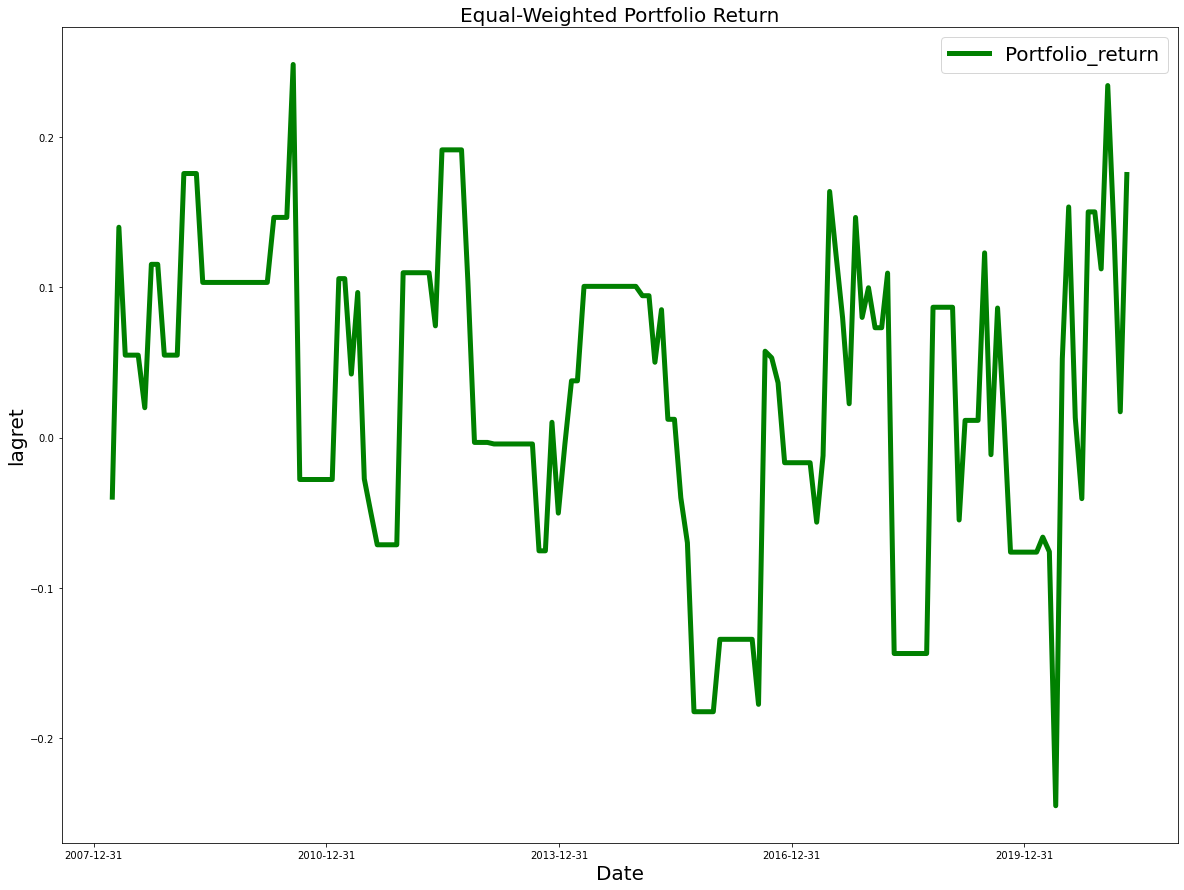

In [40]:
plt.plot(navmewport['date'],navmewport['lagret'], color='green', linewidth=5)
plt.xlabel('Date', fontsize=20)
plt.ylabel('lagret', fontsize=20)
plt.title('Equal-Weighted Portfolio Return', fontsize=20)
plt.legend(['Portfolio_return'], fontsize=20)
plt.gca().xaxis.set_major_locator(dates.YearLocator(3, month=12, day=31))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  4.,  1.,  0.,  0.,  6.,  6.,  0.,  0.,
         0.,  0.,  0., 13.,  1.,  3.,  3.,  1.,  7.,  7., 11.,  0., 10.,
         1.,  3.,  1., 10.,  0.,  5.,  6.,  4., 29.,  3.,  2.,  2.,  4.,
         3.,  1.,  4.,  0.,  4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
        -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
        -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24,
        -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15,
        -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
        -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
        

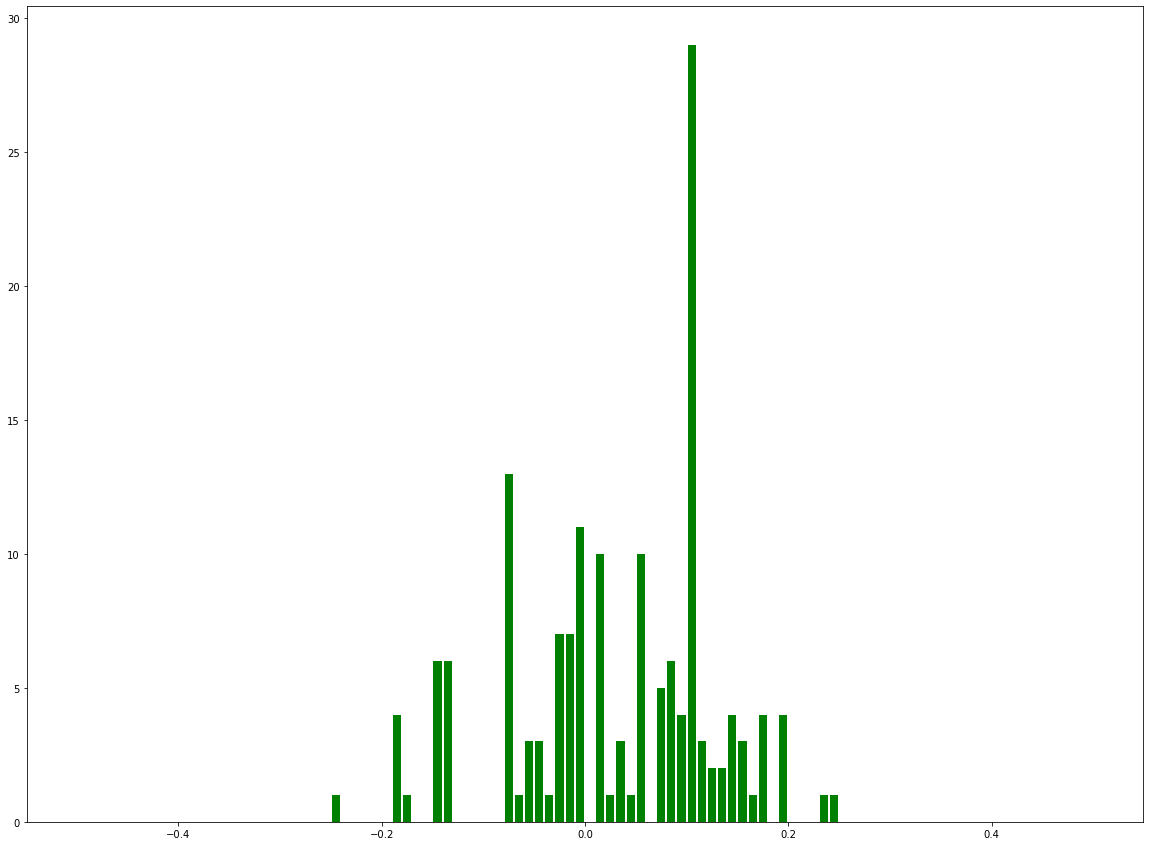

In [41]:
plt.hist(navmewport['lagret'], bins = 100, range=(-0.5,0.5), rwidth=0.8, color='green')

In [42]:
#Run regressions to test the statistical significance of the average portfolio return and 
#the average portfolio return in excess of SP500 index returns. Copy and report the regression outputs.
navmewportreg=sm.add_constant(navmewport)
navmewportreg1=sm.OLS(navmewportreg[['lagret']],navmewportreg[['const']]).fit().get_robustcov_results(cov_type='HC0')
navmewportreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lagret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 10 Jul 2021   Prob (F-statistic):                nan
Time:                        17:55:39   Log-Likelihood:                 140.87
No. Observations:                 158   AIC:                            -279.7
Df Residuals:                     157   BIC:                            -276.7
Df Model:                           0                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.008      3.714      0.000       0.014       0.045
==============================================================================
Omnibus:                        5.799   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.492
Skew:                          -0.400   Prob(JB):                       0.0642
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [43]:
#The portfolio containing >= the 90th percentile of net asset values has average returns of 2.93%
#and with a p value of 0, the returns are statistically significant.

In [44]:
indexnavmportmerge=pd.merge(navmewportreg,indexret1,left_on=['Year','Month'], right_on=['Year','Month'],how='inner')
indexnavmportmerge

,const,Year,Month,lagret,date,sp500_ret_m,nasdaq_ret_m,r2000_ret_m,Date
0,1.0,2008,3,-0.039635,2008-03-28,-0.005960,0.003355,0.002609,2008-03-28
1,1.0,2008,4,0.139934,2008-04-28,0.047547,0.058663,0.041005,2008-04-28
2,1.0,2008,5,0.054839,2008-05-28,0.010674,0.045532,0.044821,2008-05-28
3,1.0,2008,6,0.054839,2008-06-28,-0.085962,-0.091047,-0.078340,2008-06-28
4,1.0,2008,7,0.054839,2008-07-28,-0.009859,0.014204,0.036047,2008-07-28
...,...,...,...,...,...,...,...,...,...
153,1.0,2020,12,0.112212,2020-12-28,0.037121,0.056526,0.085195,2020-12-28
154,1.0,2021,1,0.234212,2021-01-28,-0.011137,0.014153,0.050019,2021-01-28
155,1.0,2021,2,0.131116,2021-02-28,0.026091,0.009308,0.061443,2021-02-28
156,1.0,2021,3,0.017159,2021-03-28,0.042439,0.004133,0.008846,2021-03-28


In [45]:
indexnavmportmerge['navm_ret_ex']=indexnavmportmerge['lagret']-indexportmerge['sp500_ret_m']
indexnavmportmerge

,const,Year,Month,lagret,date,sp500_ret_m,nasdaq_ret_m,r2000_ret_m,Date,navm_ret_ex
0,1.0,2008,3,-0.039635,2008-03-28,-0.005960,0.003355,0.002609,2008-03-28,0.024570
1,1.0,2008,4,0.139934,2008-04-28,0.047547,0.058663,0.041005,2008-04-28,0.063120
2,1.0,2008,5,0.054839,2008-05-28,0.010674,0.045532,0.044821,2008-05-28,0.049749
3,1.0,2008,6,0.054839,2008-06-28,-0.085962,-0.091047,-0.078340,2008-06-28,0.079874
4,1.0,2008,7,0.054839,2008-07-28,-0.009859,0.014204,0.036047,2008-07-28,0.065579
...,...,...,...,...,...,...,...,...,...,...
153,1.0,2020,12,0.112212,2020-12-28,0.037121,0.056526,0.085195,2020-12-28,0.088649
154,1.0,2021,1,0.234212,2021-01-28,-0.011137,0.014153,0.050019,2021-01-28,0.269795
155,1.0,2021,2,0.131116,2021-02-28,0.026091,0.009308,0.061443,2021-02-28,0.087999
156,1.0,2021,3,0.017159,2021-03-28,0.042439,0.004133,0.008846,2021-03-28,0.010226


In [46]:
navmninetyexreg=sm.OLS(indexnavmportmerge[['navm_ret_ex']],indexnavmportmerge[['const']]).fit().get_robustcov_results(cov_type='HC0')
navmninetyexreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            navm_ret_ex   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 10 Jul 2021   Prob (F-statistic):                nan
Time:                        17:55:40   Log-Likelihood:                 133.25
No. Observations:                 158   AIC:                            -264.5
Df Residuals:                     157   BIC:                            -261.4
Df Model:                           0                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0257      0.008      3.101      0.002       0.009       0.042
==============================================================================
Omnibus:                        2.124   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                2.148
Skew:                          -0.274   Prob(JB):                        0.342
Kurtosis:                       2.838   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [47]:
#The >= 90th percentile of navm generated average returns of 2.57% in excess of the S&P500
#with a p value of 0.002, this return is statistically significant.

In [48]:
#Regress portfolio returns in excess of risk-free rate on the six factors. Copy and report the regression outputs.
navmninetyfactors=pd.merge(navmewport, factors, left_on=['Year','Month'], right_on=['Year','Month'])
navmninetyfactors

,Year,Month,lagret,date,MktRF,SMB,HML,RMW,CMA,MOM,RF
0,2008,3,-0.039635,2008-03-28,-0.0093,0.0066,0.0014,0.0095,0.0047,0.0410,0.0017
1,2008,4,0.139934,2008-04-28,0.0460,-0.0107,-0.0096,0.0199,-0.0254,-0.0033,0.0018
2,2008,5,0.054839,2008-05-28,0.0186,0.0314,-0.0145,0.0104,0.0004,0.0321,0.0018
3,2008,6,0.054839,2008-06-28,-0.0844,0.0119,-0.0277,0.0494,-0.0042,0.1254,0.0017
4,2008,7,0.054839,2008-07-28,-0.0077,0.0363,0.0527,-0.0120,0.0106,-0.0513,0.0015
...,...,...,...,...,...,...,...,...,...,...,...
152,2020,11,0.150150,2020-11-28,0.1247,0.0675,0.0211,-0.0278,0.0105,-0.1225,0.0001
153,2020,12,0.112212,2020-12-28,0.0463,0.0467,-0.0136,-0.0215,0.0000,-0.0242,0.0001
154,2021,1,0.234212,2021-01-28,-0.0003,0.0688,0.0285,-0.0333,0.0468,0.0437,0.0000
155,2021,2,0.131116,2021-02-28,0.0278,0.0451,0.0708,0.0009,-0.0197,-0.0768,0.0000


In [49]:
navmninetyfactors['ex_ret']=navmninetyfactors['lagret']-navmninetyfactors['RF']
navmninetyfactors

,Year,Month,lagret,date,MktRF,SMB,HML,RMW,CMA,MOM,RF,ex_ret
0,2008,3,-0.039635,2008-03-28,-0.0093,0.0066,0.0014,0.0095,0.0047,0.0410,0.0017,-0.041335
1,2008,4,0.139934,2008-04-28,0.0460,-0.0107,-0.0096,0.0199,-0.0254,-0.0033,0.0018,0.138134
2,2008,5,0.054839,2008-05-28,0.0186,0.0314,-0.0145,0.0104,0.0004,0.0321,0.0018,0.053039
3,2008,6,0.054839,2008-06-28,-0.0844,0.0119,-0.0277,0.0494,-0.0042,0.1254,0.0017,0.053139
4,2008,7,0.054839,2008-07-28,-0.0077,0.0363,0.0527,-0.0120,0.0106,-0.0513,0.0015,0.053339
...,...,...,...,...,...,...,...,...,...,...,...,...
152,2020,11,0.150150,2020-11-28,0.1247,0.0675,0.0211,-0.0278,0.0105,-0.1225,0.0001,0.150050
153,2020,12,0.112212,2020-12-28,0.0463,0.0467,-0.0136,-0.0215,0.0000,-0.0242,0.0001,0.112112
154,2021,1,0.234212,2021-01-28,-0.0003,0.0688,0.0285,-0.0333,0.0468,0.0437,0.0000,0.234212
155,2021,2,0.131116,2021-02-28,0.0278,0.0451,0.0708,0.0009,-0.0197,-0.0768,0.0000,0.131116


In [50]:
navmninetyfactors=sm.add_constant(navmninetyfactors)
navmninetyfactors=sm.OLS(navmninetyfactors['ex_ret'],navmninetyfactors[['const','MktRF','SMB','HML','MOM','RMW','CMA']]).fit().get_robustcov_results(cov_type='HC0')
navmninetyfactors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ex_ret   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.768
Date:                Sat, 10 Jul 2021   Prob (F-statistic):              0.109
Time:                        17:55:40   Log-Likelihood:                 144.56
No. Observations:                 157   AIC:                            -275.1
Df Residuals:                     150   BIC:                            -253.7
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.008      4.130      0.000       0.017       0.048
MktRF         -0.2165      0.203     -1.068      0.287      -0.617       0.184
SMB            0.1240      0.337      0.368      0.713      -0.542       0.790
HML            0.5756      0.305      1.889      0.061      -0.026       1.177
MOM           -0.1171      0.189     -0.618      0.538      -0.491       0.257
RMW           -0.3705      0.453     -0.818      0.415      -1.266       0.525
CMA            0.0688      0.631      0.109      0.913      -1.177       1.315
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.925
Skew:                          -0.366   Prob(JB):                       0.0852
Kurtosis:                       2.534   Cond. No.                         82.5
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [51]:
#Since none of the factors are statistically significant, explaining only 5.1% of returns, and the coefficient
#has a p value of 0 or close to 0, it can be concluded that the >= 90th percentile of navm portfolio
#does not rely on the six factors.